In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['svg.fonttype'] = 'none'  # https://stackoverflow.com/questions/34387893/output-matplotlib-figure-to-svg-with-text-as-text-not-curves
import dateutil
import plotly.graph_objects as go
import plotly.express as px

In [2]:
fr_raw = pd.read_csv(r'..\data\search\peak_finder\Final_Results.csv').dropna(axis=1, how='all')
fr_norm = pd.read_csv(r'..\data\processed\lipidomics_linregress_normalized_data.csv')
fr_filt = pd.read_csv(r'..\data\processed\lipidomics_normalized_filtered_data.csv', index_col=0)
file_grouping = pd.read_csv(r'..\data\metadata\file_grouping.csv', index_col=0)

fr_quant_filenames_in_analytical_order = file_grouping[file_grouping['quant_file'] == True]['fr_name'].to_list()

animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic = [1076, 1082, 1101]
impaired = [1060, 1062, 1074, 1092, 1102]
normal = [1091, 1093]

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')

FileNotFoundError: [Errno 2] No such file or directory: '..\\data\\search\\peak_finder\\Final_Results.csv'

In [3]:
fr_filt

,Retention Time (min),Quant Ion,Polarity,Area (max),Identification,Lipid Class,Features Found,20210729_AJ_Toh_RatBloodGlucose_T1060M_20210322_8wk_FBG.raw (F3),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210329_9wk_FBG.raw (F5),...,20210729_AJ_Toh_RatBloodGlucose_T1101M_20210402_9wk_FBG.raw (F55),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210406_9wk_RBG.raw (F56),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210410_10wk_FBG.raw (F57),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210413_10wk_RBG.raw (F58),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210327_8wk_FBG.raw (F59),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210330_8wk_RBG.raw (F60),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210402_9wk_FBG.raw (F61),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210406_9wk_RBG.raw (F62),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210410_10wk_FBG.raw (F63),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210413_10wk_RBG.raw (F64)
Unique Identifier,,,,,,,,,,,,,,,,,,,,,
unknown_679.05463_0.536,0.536,679.05463,+,2.408421e+07,unknown,unknown,49,9.974970e+06,1.692144e+07,1.258949e+07,...,1.156896e+07,9.046158e+06,5.364408e+06,1.615157e+07,1.210451e+07,1.079174e+07,1.185658e+07,9.721337e+06,9.394720e+06,1.111960e+07
unknown_641.1087_0.537,0.537,641.10870,+,5.522238e+07,unknown,unknown,36,4.024286e+07,5.397037e+07,3.543749e+07,...,3.207186e+07,2.406236e+07,2.035223e+07,3.496832e+07,3.013993e+07,4.966627e+06,3.181116e+07,2.802334e+07,2.191732e+07,2.338934e+07
unknown_951.15973_0.541,0.541,951.15973,-,3.238113e+07,unknown,unknown,10,1.411587e+07,3.166872e+07,1.871277e+07,...,1.690386e+07,1.185835e+07,1.125893e+07,1.431970e+07,1.401550e+07,9.622362e+06,1.533037e+07,1.460625e+07,1.344883e+07,1.259183e+07
unknown_329.03067_0.542,0.542,329.03067,-,2.882770e+08,unknown,unknown,55,1.100528e+08,6.605294e+07,1.567150e+08,...,1.465332e+08,1.474987e+08,1.043309e+08,2.587329e+08,8.100482e+07,1.108561e+08,1.279825e+08,1.603498e+08,1.173300e+08,1.308413e+08
unknown_969.13147_0.544,0.544,969.13147,-,1.697296e+07,unknown,unknown,14,9.488360e+06,1.661334e+07,1.098442e+07,...,6.829185e+06,7.136770e+06,5.199019e+06,6.029466e+06,5.975402e+06,3.492394e+06,8.607944e+06,7.868903e+06,5.873010e+06,7.439766e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
unknown_897.82532_20.148,20.148,897.82532,+,3.097802e+06,unknown,unknown,15,1.500998e+06,2.481922e+05,1.670474e+06,...,8.429923e+05,3.523582e+05,2.826359e+05,2.958877e+05,8.993961e+05,2.819100e+05,6.022171e+05,6.044960e+05,1.120074e+06,1.629972e+05
unknown_974.9118_20.163,20.163,974.91180,+,4.515337e+06,unknown,unknown,4,5.875953e+05,3.533019e+05,5.673557e+05,...,3.282929e+05,4.255684e+05,1.014151e+05,3.628107e+05,3.027615e+05,4.633196e+05,2.461883e+05,8.729563e+05,4.072792e+05,5.949969e+05
unknown_593.58716_20.175,20.175,593.58716,+,3.296976e+06,unknown,unknown,19,1.593412e+06,1.838481e+05,1.810744e+06,...,7.550607e+05,2.935374e+05,3.475240e+05,2.231748e+05,9.950243e+05,2.409051e+05,6.785744e+05,5.024885e+05,1.198124e+06,1.796502e+05


## 1a. Feature quant boxplots per QC

Text(0.5, 1.0, 'Quality Control Samples\nFeature Quantitations')

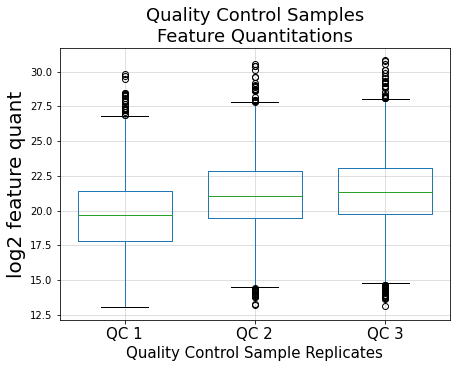

In [4]:
df = fr_raw

np.log2(df.filter(regex='QC')).boxplot(widths = 0.72)
fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches((7, 5))
ax.grid(True, alpha=0.5)
plt.xticks([1, 2, 3], labels=['QC 1', 'QC 2', 'QC 3'], fontsize=15)
plt.xlabel('Quality Control Sample Replicates', fontsize=15)
plt.ylabel('log2 feature quant', fontsize=20)
plt.title('Quality Control Samples\nFeature Quantitations', fontsize=18)

# plt.savefig(r'..\reports\collaborator reports\preliminary 20200812\figures\QC samples feature quant.png')  

## 1b. Feature quant boxplots across samples 

60


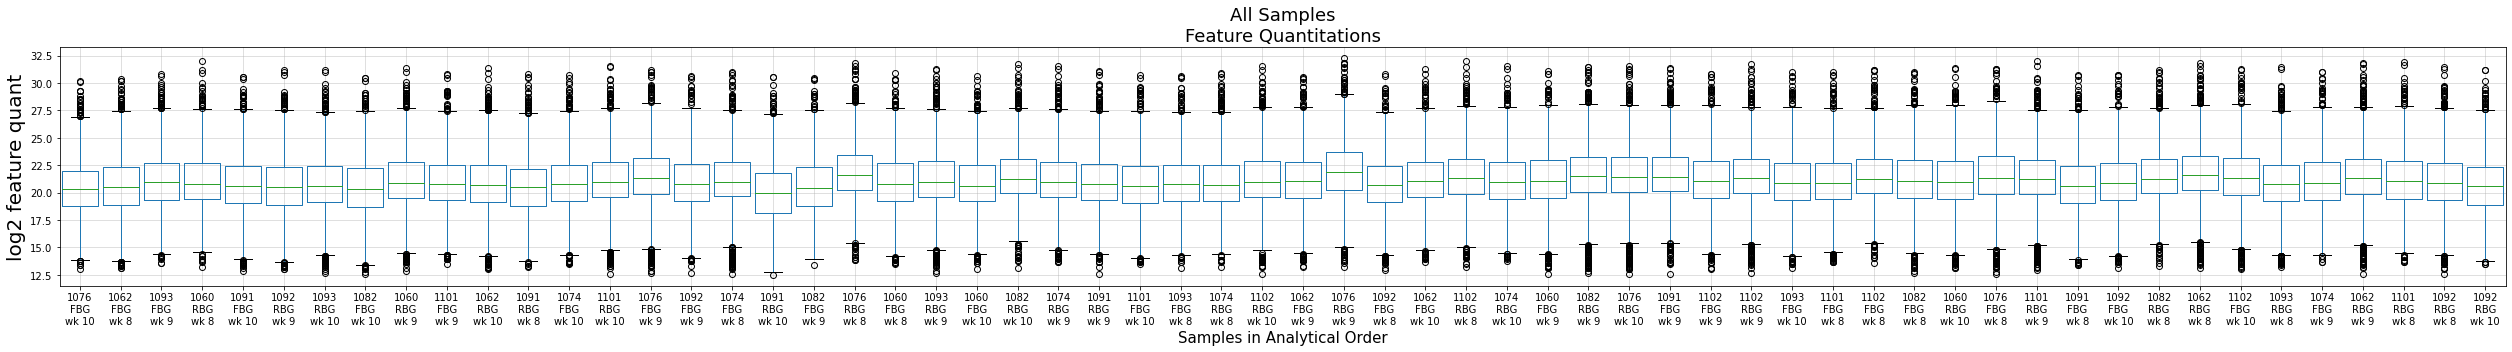

In [6]:
df = fr_raw

np.log2(df[fr_quant_filenames_in_analytical_order]).boxplot(widths=0.88)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches((35, 5))
ax.grid(True, alpha=0.5)

# Get the LipiDex file number (F43) for each file
# labels = [re.search(r'\((.*?)\)', col_name).group(1) for col_name in fr_quant_filenames_in_analytical_order]

labels = []

for filename in fr_quant_filenames_in_analytical_order:
    rat_label = str(int(file_grouping[file_grouping['fr_name'] == filename]['rat_label'].values[0]))
    bg_type = file_grouping[file_grouping['fr_name'] == filename]['bg_type'].values[0]
    week = str(int(file_grouping[file_grouping['fr_name'] == filename]['week'].values[0]))
    labels.append(f'{rat_label}\n{bg_type}\nwk {week}')

print(len(set(labels)))
    
plt.xticks(range(1, 61), labels=labels)
# plt.xticks(range(1, 61), labels=samples.columns.to_list(), fontsize=15, rotation=90)
plt.xlabel('Samples in Analytical Order', fontsize=15)
plt.ylabel('log2 feature quant', fontsize=20)
plt.title('All Samples\nFeature Quantitations', fontsize=18)
plt.tight_layout()

# plt.savefig(r'..\reports\collaborator reports\preliminary 20200812\figures\all samples feature quant analytical order 1.png')           


30


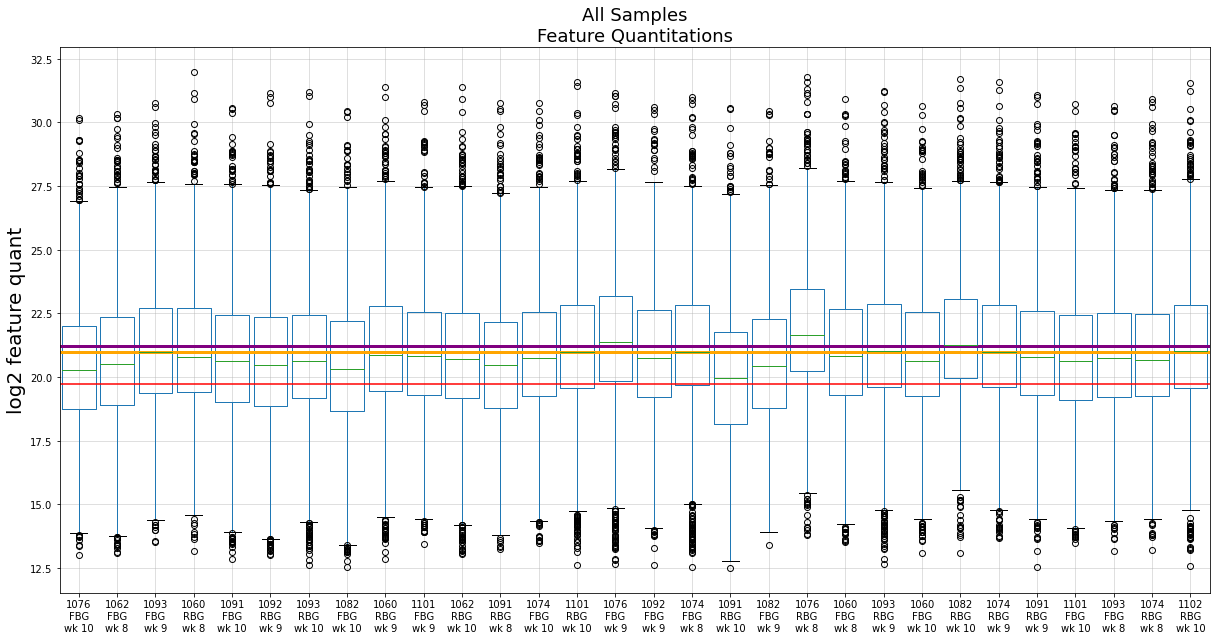

In [7]:
df = fr_raw

np.log2(df[fr_quant_filenames_in_analytical_order].iloc[:,0:30]).boxplot(widths=0.88)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches((17, 9))
ax.grid(True, alpha=0.5)

# Get the LipiDex file number (F43) for each file
# labels = [re.search(r'\((.*?)\)', col_name).group(1) for col_name in fr_quant_filenames_in_analytical_order]

labels = []

for filename in fr_quant_filenames_in_analytical_order[0:30]:
    rat_label = str(int(file_grouping[file_grouping['fr_name'] == filename]['rat_label'].values[0]))
    bg_type = file_grouping[file_grouping['fr_name'] == filename]['bg_type'].values[0]
    week = str(int(file_grouping[file_grouping['fr_name'] == filename]['week'].values[0]))
    labels.append(f'{rat_label}\n{bg_type}\nwk {week}')

print(len(set(labels)))
    
# Plot a line corresponding to the median of QC1 and median of all plots
qc1_median = np.log2(df.filter(regex='QC1')).median()
all_median = np.log2(df.filter(regex='.raw').mean(axis=1)).median()
qc2_qc3_median = np.log2(df.filter(regex='QC2|QC3').mean(axis=1)).median()
plt.plot([0.5, 30.5], [qc1_median, qc1_median], c='r')
plt.plot([0.5, 30.5], [all_median, all_median], c='orange', linewidth=3)
plt.plot([0.5, 30.5], [qc2_qc3_median, qc2_qc3_median], c='purple', linewidth=3)
    
plt.xticks(range(1, 31), labels=labels)
# plt.xticks(range(1, 61), labels=samples.columns.to_list(), fontsize=15, rotation=90)
# plt.xlabel('Samples in Analytical Order', fontsize=15)
plt.ylabel('log2 feature quant', fontsize=20)
plt.title('All Samples\nFeature Quantitations', fontsize=18)
plt.tight_layout()

# plt.savefig(r'..\reports\collaborator reports\preliminary 20200812\figures\all samples feature quant analytical order 1.png')           


30


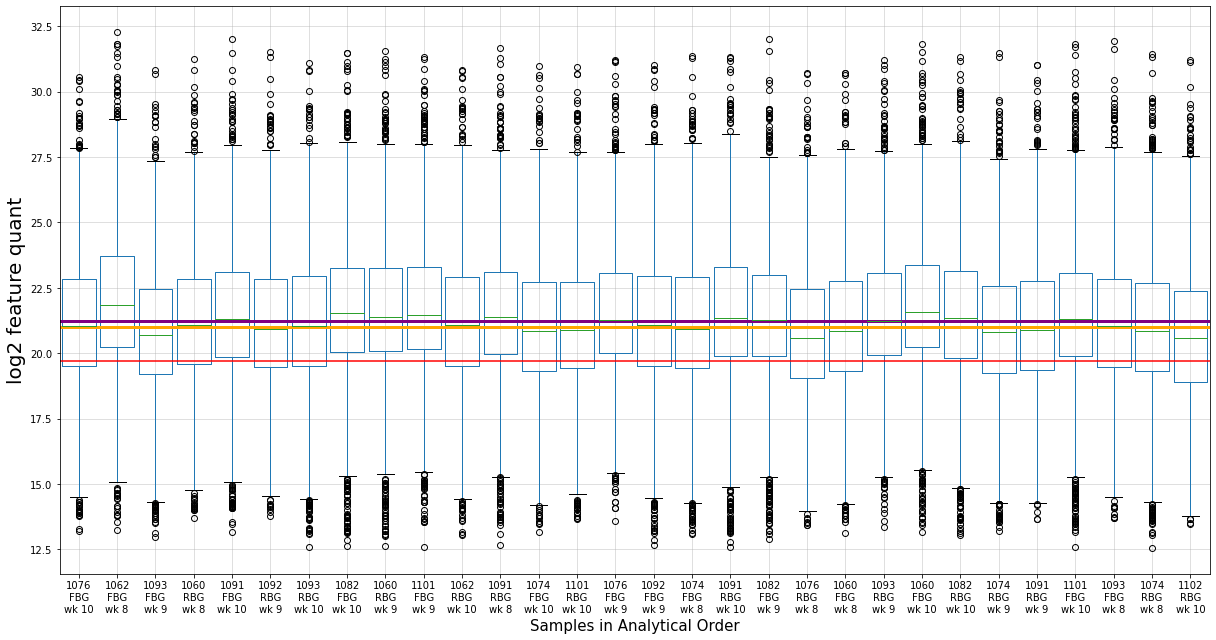

In [8]:
df = fr_raw

np.log2(df[fr_quant_filenames_in_analytical_order].iloc[:,30:]).boxplot(widths=0.88)

fig = plt.gcf()
ax = plt.gca()
fig.set_size_inches((17, 9))
ax.grid(True, alpha=0.5)

# Get the LipiDex file number (F43) for each file
# labels = [re.search(r'\((.*?)\)', col_name).group(1) for col_name in fr_quant_filenames_in_analytical_order]

labels = []

for filename in fr_quant_filenames_in_analytical_order[0:30]:
    rat_label = str(int(file_grouping[file_grouping['fr_name'] == filename]['rat_label'].values[0]))
    bg_type = file_grouping[file_grouping['fr_name'] == filename]['bg_type'].values[0]
    week = str(int(file_grouping[file_grouping['fr_name'] == filename]['week'].values[0]))
    labels.append(f'{rat_label}\n{bg_type}\nwk {week}')

print(len(set(labels)))

plt.plot([0.5, 30.5], [qc1_median, qc1_median], c='r')
plt.plot([0.5, 30.5], [all_median, all_median], c='orange', linewidth=3)
plt.plot([0.5, 30.5], [qc2_qc3_median, qc2_qc3_median], c='purple', linewidth=3)
    
plt.xticks(range(1, 31), labels=labels)
# plt.xticks(range(1, 61), labels=samples.columns.to_list(), fontsize=15, rotation=90)
plt.xlabel('Samples in Analytical Order', fontsize=15)
plt.ylabel('log2 feature quant', fontsize=20)
# plt.title('All Samples\nFeature Quantitations', fontsize=18)
plt.tight_layout()

# plt.savefig(r'..\reports\collaborator reports\preliminary 20200812\figures\all samples feature quant analytical order 2.png')           


### 1c. Do a breakdown of 2 boxplots per animal, one F, one R. 
20 total boxplots, show groupings

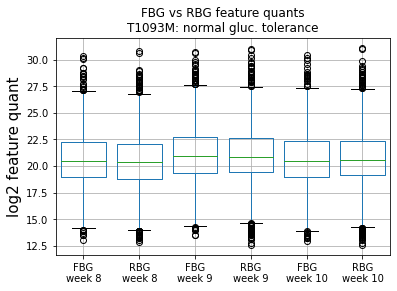

In [9]:
for animal in animals_used[1:2]:
    tmp_df = file_grouping[(file_grouping['rat_label'] == animal) & (file_grouping['quant_file'] == True)]
    rbg_fr_filenames = tmp_df[tmp_df['bg_type'] == 'RBG']['fr_name'].to_list() 
    fbg_fr_filenames = tmp_df[tmp_df['bg_type'] == 'FBG']['fr_name'].to_list() 
    
    fr_subset = fr_norm[rbg_fr_filenames + fbg_fr_filenames]
    fr_subset = fr_subset.sort_index(axis=1)
    labels = []
    for fr_filename in fr_subset:
        row = file_grouping[file_grouping['fr_name'] == fr_filename]
        animal_number = int(row['rat_label'].values[0])
        bg_type = str(row['bg_type'].values[0])
        week = str(int(row['week'].values[0]))
        label = bg_type + '\nweek ' + week
        labels.append(label)
    
    np.log2(fr_subset).boxplot(widths=0.80)
    plt.ylabel('log2 feature quant', fontsize=15)
    plt.xticks(list(range(1,7)), labels=labels)
    glucose_tolerance = animal_phenotypes[animal_phenotypes['animal'] == animal_number]['glucose_tolerance'].values[0]
    plt.title(f'FBG vs RBG feature quants\nT{animal}M: {glucose_tolerance} gluc. tolerance')

### 3. Comparing Fasted vs. Random, broken down by glucose tolerance and lipid class

TGs will be highly elevated in diabetic mice. Average each feature across the 2 normal glucose tolerance rats, per BG type

Do the same for diabetic vs impaired rats, then compare those 6 levels for TGs.

Should expect to see TGs elevated most in diabetic mice. 





Repeat this analysis for each unique lipid class with more than 10 IDs per class

Text(0.5, 0.98, 'Lipid Class and Glucose Tolerance\nRBG vs FBG\nAverage of all 3 weeks')

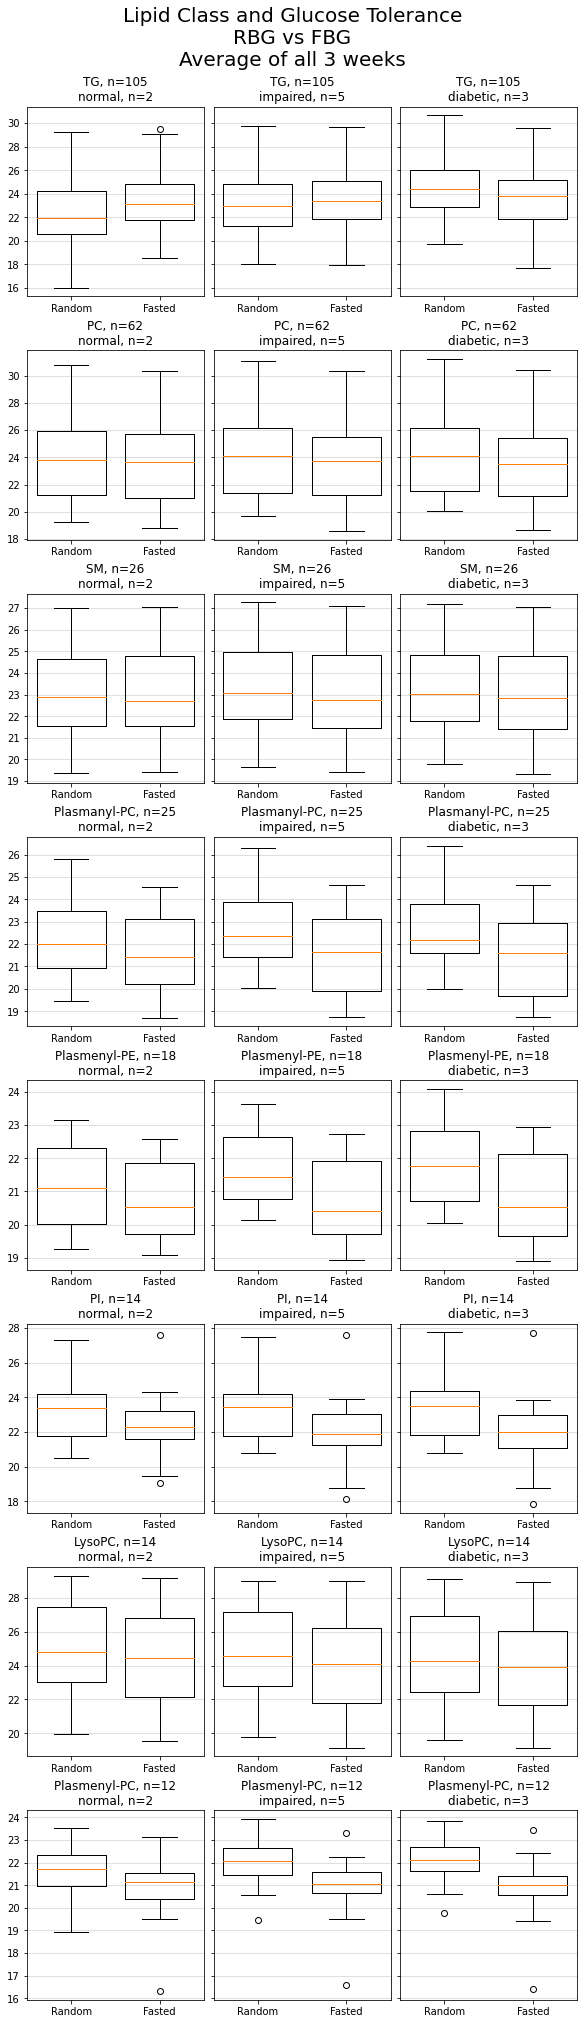

In [17]:
df = fr_filt

n_rats_per_gluc_tolerance = {'diabetic': 3, 'impaired': 5, 'normal': 2}

# 9 rows for each of 9 lipid classes that have # IDs > 10
# 3 cols for each glucose_tolerance 
fig, axs = plt.subplots(nrows=8, ncols=3, sharey='row', constrained_layout=True)
fig.set_size_inches((8, 28))
# plt.tight_layout()

lipid_classes = df['Lipid Class'].value_counts().iloc[1:9].to_dict()

for i, lipid_class in enumerate(lipid_classes):  # i = row index for axs
    for j, glucose_tolerance in enumerate(['normal', 'impaired', 'diabetic']):  # j = column index for axs
        
        # Get the fr_filenames from file_grouping['fr_name'] that match each iterator in each for loop
        # Then get the data from fr[fr_filenames]
        fr_filenames = file_grouping[(file_grouping['quant_file'] == True) &
                                     (file_grouping['glucose_tolerance'] == glucose_tolerance)]['fr_name']
        
        df = fr_filt[fr_filt['Lipid Class'] == lipid_class][fr_filenames]
        rbg = np.log2(df.filter(regex='RBG').mean(axis=1))
        fbg = np.log2(df.filter(regex='FBG').mean(axis=1))

        ax = axs[i][j]
        
        ax.boxplot([rbg, fbg], widths=0.78)
        ax.grid(alpha=0.5, axis='y')

        ax.set_title(f'{lipid_class}, n={lipid_classes[lipid_class]}'
                     f'\n{glucose_tolerance}, n={n_rats_per_gluc_tolerance[glucose_tolerance]}')
        ax.set_xticklabels(['Random', 'Fasted'])
        
fig.suptitle('Lipid Class and Glucose Tolerance\nRBG vs FBG\nAverage of all 3 weeks', fontsize=20)
# plt.gcf()
# fig.supylabel('log2 feature quant', fontsize=20)  
    
# plt.savefig(r'..\reports\collaborator reports\preliminary 20210812\figures\lipid class feature quant comparison.png')           


Text(0.02, 0.5, 'log2 feature quant')

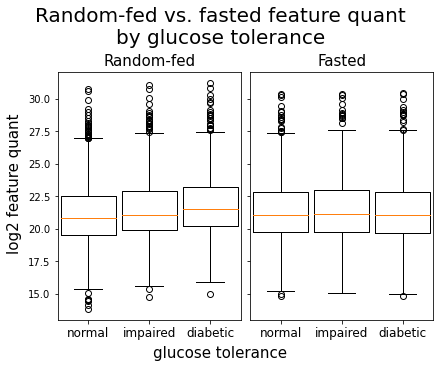

In [68]:
df = np.log2(fr_filt[fr_quant_filenames_in_analytical_order])

fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True, constrained_layout=True)
fig.set_size_inches((6, 5))

for ax, bg_type in zip(axs, ['RBG', 'FBG']):
    for tol_type, position in zip(['normal', 'impaired', 'diabetic'], [1,2,3]):
        # Get filenames that match bg_type and tol_type
        cols = file_grouping[(file_grouping['bg_type'] == bg_type) & \
                             (file_grouping['glucose_tolerance'] == tol_type) & \
                             (file_grouping['quant_file'] == True)]['fr_name']
        ax.boxplot(df[cols].mean(axis=1), positions=[position, ], widths=0.9)
        
        # Option for barplots, much slower to render though
#         ax.bar(position, df[cols].mean(axis=1))
        
    ax.set_title('Random-fed' if bg_type == 'RBG' else 'Fasted', fontsize=15)
    ax.set_xticks([1,2,3], )
    ax.set_xticklabels(['normal', 'impaired', 'diabetic'], fontsize=12)

fig.suptitle('Random-fed vs. fasted feature quant\nby glucose tolerance', fontsize=20)
fig.supxlabel('glucose tolerance', fontsize=15)
fig.supylabel('log2 feature quant', fontsize=15)


# 3. Comparing Fasted vs. Random, broken down by glucose tolerance and lipid class


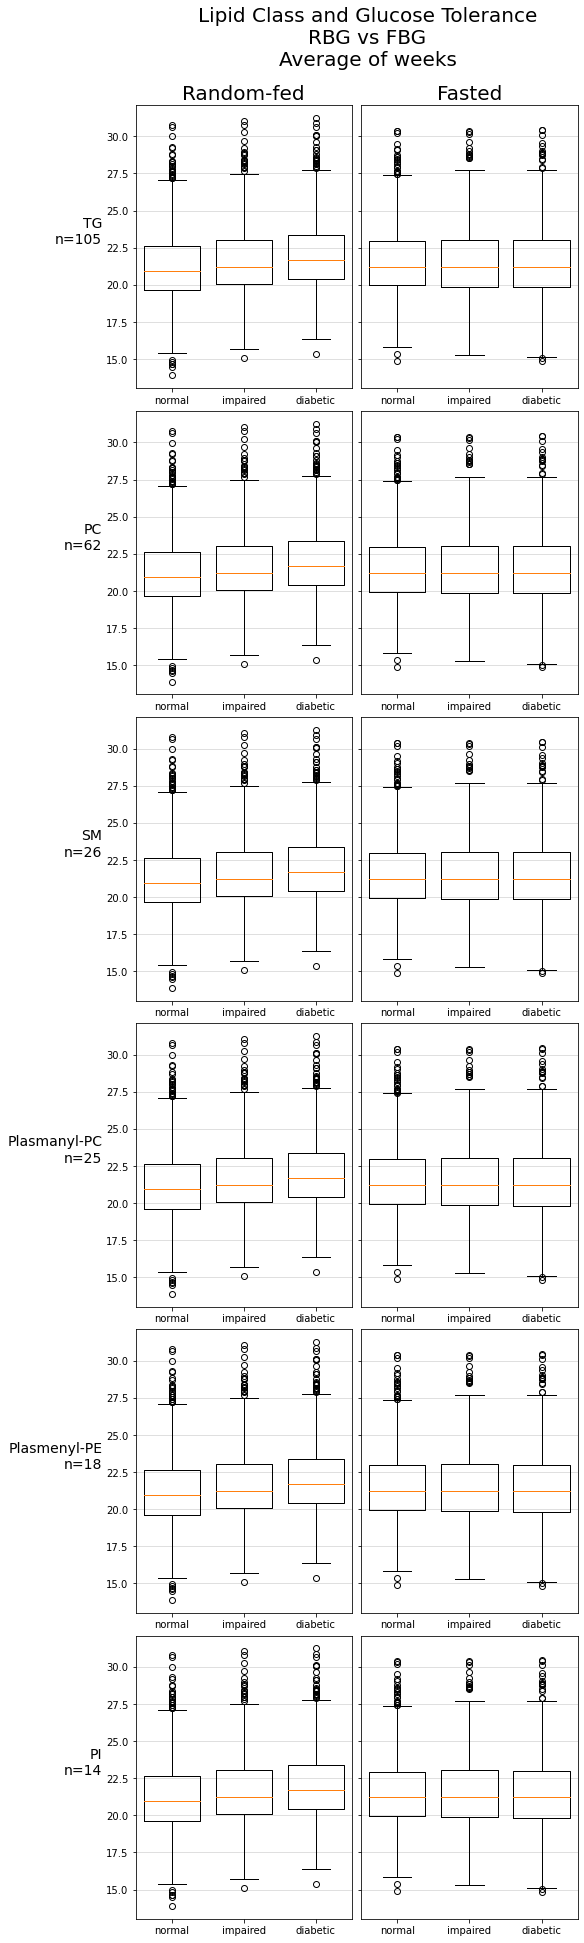

In [66]:
num_lipid_classes = 6
df = fr_filt
n_rats_per_gluc_tolerance = {'diabetic': 3, 'impaired': 5, 'normal': 2}
# 9 rows for each of 9 lipid classes that have # IDs > 10
# 3 cols for each glucose_tolerance 
fig, axs = plt.subplots(nrows=num_lipid_classes, ncols=2, sharey='row', constrained_layout=True)
fig.set_size_inches((8, num_lipid_classes*4.3))
# plt.tight_layout()

lipid_classes = df['Lipid Class'].value_counts().iloc[1:num_lipid_classes+1].to_dict()

for i, lipid_class in enumerate(lipid_classes):  # i = row index for axs
    for j, feeding_method in enumerate(['RBG', 'FBG']):  # j = column index for axs
        datasets = []
        for k, gluc_tol in enumerate(['normal', 'impaired', 'diabetic']):
            # Get the fr_filenames from file_grouping['fr_name'] that match each iterator in each for loop
            # Then get the data from fr[fr_filenames]
            fr_filenames = file_grouping.loc[(file_grouping['quant_file']) & \
                                             (file_grouping['bg_type'] == feeding_method) & \
                                             (file_grouping['glucose_tolerance'] == gluc_tol), 'fr_name']
            data = np.log2(fr_filt[fr_filenames].mean(axis=1))
            datasets.append(data)
        ax = axs[i][j]
        ax.boxplot(datasets, widths=0.78)
        ax.grid(alpha=0.5, axis='y')
        if i == 0:
            ax.set_title(('Random-fed' if feeding_method == 'RBG' else 'Fasted'), fontsize=20)
        if j == 0:
#             ax.yaxis.set_label_position('right')
            ax.set_ylabel(f'{lipid_class}\nn={lipid_classes[lipid_class]}', rotation=0, ha='right', fontsize=14)
#         ax.set_title(f'\n{glucose_tolerance}, n={n_rats_per_gluc_tolerance[glucose_tolerance]}')
        ax.set_xticklabels(['normal', 'impaired', 'diabetic'])
        
fig.suptitle('Lipid Class and Glucose Tolerance\nRBG vs FBG\nAverage of weeks', fontsize=20, x=0.63, y=1.04)
# fig.supylabel('log2 feature quant', fontsize=20)  
    
plt.savefig(r'..\reports\figures\1-2-1\Random_vs_fasted_on_lipid_class.svg')           


In [12]:
# Unique lipid classes

unique_classes = fr['Lipid Class'].unique()[1:]
print(fr['Lipid Class'].value_counts().iloc[0:9])
print(unique_classes)

unique_classes = fr_filtered['Lipid Class'].unique()[1:]
print(unique_classes)
print(fr_filtered['Lipid Class'].value_counts().iloc[1:11])  # 1:11 drops the 800+ unknowns and keeps TG through PE
print(unique_classes)

tg_quants = fr[fr_quant_filenames_in_analytical_order][fr['Lipid Class'] == 'TG']

rbg_tg_quants = tg_quants.filter(regex='RBG')
fbg_tg_quants = tg_quants.filter(regex='FBG')

np.log2(rbg_tg_quants).boxplot()
fig = plt.gcf()
fig.set_size_inches((35, 5))
ax = plt.gca()
ax.grid(True, alpha=0.5)

labels = [re.search(r'\((.*?)\)', col_name).group(1) for col_name in fbg_tg_quants.columns.to_list()]


plt.xticks(ticks=list(range(1, fbg_tg_quants.shape[1] + 1)), 
           labels=labels);
plt.xlabel('sample')
plt.ylabel('log2 Feature Quant')
plt.title('FBG Triacylglycerol (TG) levels')

NameError: name 'fr' is not defined

In [ ]:
np.log2(tg_quants.filter(regex='RBG')).boxplot()
# plt.xticks()

In [ ]:
fig, axs = plt.subplots()
fig.set_size_inches((8,5))

axs.boxplot([np.log2(fr[fr_quant_filenames_in_analytical_order].filter(regex='RBG').mean(axis=1)), 
             np.log2(fr[fr_quant_filenames_in_analytical_order].filter(regex='FBG').mean(axis=1))],
            )
axs.grid(alpha=0.5, axis='y')
plt.title('Average Feature quant\nRBG vs FBG', fontsize=20)
plt.xticks([1,2], ['RBG', 'FBG'], fontsize=12)
plt.ylabel('log2 feature quant', fontsize=15)
plt.tight_layout()
# plt.figsize((10, 8))

# plt.savefig(r'..\reports\collaborator reports\preliminary 20200812\figures\average feature quant rbg vs fbg.png')           


In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=np.log2(fr['20210729_AJ_Toh_RatBloodGlucose_T1091M_20210327_8wk_FBG.raw (F35)'])))
fig.add_trace(go.Box(y=np.log2(fr['20210729_AJ_Toh_RatBloodGlucose_T1091M_20210327_8wk_FBG.raw (F35)'])))


fig.update_layout(width=500, height=800,
                  title='My title',
                  xaxis_title='X label',
                  yaxis_title='Y label',
#                   legend_title='Legend title',
                  font=dict(size=18))

# fig.title='hi'
fig.show()

In [ ]:
fig = go.Figure()


for animal in animals_used[:1]:
    tmp_df = file_grouping[(file_grouping['rat_label'] == animal) & (file_grouping['quant_file'] == True)]
    rbg_fr_filenames = tmp_df[tmp_df['bg_type'] == 'RBG']['fr_name'].to_list() 
    fbg_fr_filenames = tmp_df[tmp_df['bg_type'] == 'FBG']['fr_name'].to_list() 
    
#     print(rbg_fr_filenames)
    
    fr_subset = fr[rbg_fr_filenames + fbg_fr_filenames]
    fr_subset = fr_subset.sort_index(axis=1)
#     display(fr_subset)
    labels = []
    
#     fig = make_subplots(rows=1, cols=fr_subset.shape[1],
#                         shared_yaxes=True)
    
    for i, fr_filename in enumerate(fr_subset):
        row = file_grouping[file_grouping['fr_name'] == fr_filename]
#         display(row)
        animal_number = str(int(row['rat_label'].values[0]))
#         print(animal_number)
        
        bg_type = str(row['bg_type'].values[0])
#         print(bg_type)
        
        week = str(int(row['week'].values[0]))
#         print(week)
#         print(row['week'])
        label = animal_number + ' ' + bg_type + '' + week
        labels.append(label)
    
        fig.add_trace(go.Box(y=np.log2(fr_subset[fr_filename]), ), )
#                              row=1, col=i+1)


fig.update_layout(width=1000, height=800,
                  title='My title',
                  xaxis_title='X label',
                  yaxis_title='Y label',
#                   legend_title='Legend title',
                  font=dict(size=18))

fig.show()